# U.S. Medical Insurance Costs - B. Wortham

This is a file for running the Codecademy Portfolio Project #1 with US Medical Insurance data. 

The goal of my project is to assess smoker status on costs of insurance. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
#this is how you do it using csv
#create empty lists
age = []
sex = []
bmi = []
children = []
smoker_status =[]
region = []
charges = []

In [3]:
#create helper function to load data into each of the lists above

def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

In [4]:
load_list_data(age, 'insurance.csv', 'age')
load_list_data(sex, 'insurance.csv', 'sex')
load_list_data(bmi, 'insurance.csv', 'bmi')
load_list_data(children, 'insurance.csv', 'children')
load_list_data(smoker_status, 'insurance.csv', 'smoker')
load_list_data(region, 'insurance.csv', 'region')
load_list_data(charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

In [5]:
#this is how you do it using pandas
insurance = pd.read_csv('insurance.csv')
print(insurance)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no  southeast  11090.7

## Analysis

The goal of these analyses is to understand the insurance cost risk of smokers and how the smoker status is tied to other indicators of insurance cost like bmi.

In [6]:
# age and smoker analysis
#first break out data by age categories: < 20, 20-40, 40-60, > 60 using pandas
dfagecat20 = insurance[insurance['age']<20]
dfagecat20to40 = insurance[(insurance['age']>20) & (insurance['age']<40)]
dfagecat40to60 = insurance[(insurance['age']>40) & (insurance['age']<60)]
dfagecat60 = insurance[insurance['age']>60]

In [7]:
#calculate the average cost of insurance for smokers vs. non-smokers per age category
avgcost20smoker = dfagecat20.groupby('smoker')["charges"].mean() 
avgcost20to40smoker = dfagecat20to40.groupby('smoker')["charges"].mean()
avgcost40to60smoker = dfagecat40to60.groupby('smoker')["charges"].mean()
avgcost60smoker = dfagecat60.groupby('smoker')["charges"].mean()
#could/should probably find a way to loop this

In [8]:
#do the same as above but for BMI
avgBMI20smoker = dfagecat20.groupby('smoker')["bmi"].mean()
avgBMI20to40smoker = dfagecat20to40.groupby('smoker')["bmi"].mean()
avgBMI40to60smoker = dfagecat40to60.groupby('smoker')["bmi"].mean()
avgBMI60smoker = dfagecat60.groupby('smoker')["bmi"].mean()

Text(0.5, 1.0, '60 & over')

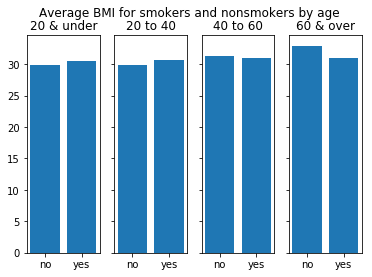

In [18]:
#plotting up the BMI results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey='row')
fig.suptitle('Average BMI for smokers and nonsmokers by age')
ax1.bar(x = avgBMI20smoker.index, height = avgBMI20smoker)
ax1.set_title('20 & under')
ax2.bar(x = avgBMI20to40smoker.index, height = avgBMI20to40smoker)
ax2.set_title('20 to 40')
ax3.bar(x= avgBMI40to60smoker.index, height = avgBMI40to60smoker)
ax3.set_title('40 to 60')
ax4.bar(x = avgBMI60smoker.index, height = avgBMI60smoker)
ax4.set_title('60 & over')

Text(0.5, 1.0, '60 & over')

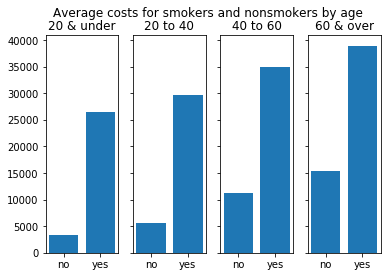

In [19]:
#figure for costs
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey='row')
fig.suptitle('Average costs for smokers and nonsmokers by age')
ax1.bar(x = avgcost20smoker.index, height = avgcost20smoker)
ax1.set_title('20 & under')
ax2.bar(x = avgcost20to40smoker.index, height = avgcost20to40smoker)
ax2.set_title('20 to 40')
ax3.bar(x= avgcost40to60smoker.index, height = avgcost40to60smoker)
ax3.set_title('40 to 60')
ax4.bar(x = avgcost60smoker.index, height = avgcost60smoker)
ax4.set_title('60 & over')